In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [8]:
url = 'BRCA.csv'
df = pd.read_csv(url)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [11]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [12]:
df.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CLEAN DATA

In [14]:
# checking and cleaning Nan values
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
# checking and cleaning duplicated values
sum(df.duplicated())

0

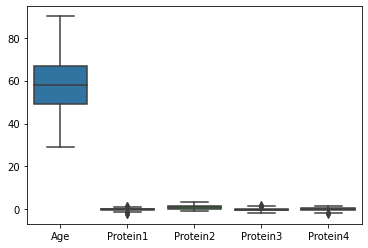

In [17]:
# checking and cleaning outliers values
sns.boxplot(data=df)
plt.show()

# Exploring Data

In [7]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [19]:
# The most 10 frequent age
df['Age'].value_counts().head(10)

59.0    15
63.0    14
54.0    13
56.0    12
50.0    12
46.0    11
68.0    10
53.0    10
62.0    10
51.0     9
Name: Age, dtype: int64

In [20]:
# Males who has a breast cancer
df[df['Gender'] == 'MALE']

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
152,TCGA-AQ-A54O,51.0,MALE,0.837890,0.50642,-0.545130,0.314900,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Simple Mastectomy,30-May-18,25-Mar-20,Alive
271,TCGA-AR-A1AV,68.0,MALE,1.470400,0.46900,0.135540,-0.289840,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Apr-19,18-Apr-20,Alive
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.269520,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead


In [9]:
print(df.loc[0:10, 'Protein1':'Protein4'])

    Protein1  Protein2  Protein3  Protein4
0   0.080353   0.42638  0.547150  0.273680
1  -0.420320   0.57807  0.614470 -0.031505
2   0.213980   1.31140 -0.327470 -0.234260
3   0.345090  -0.21147 -0.193040  0.124270
4   0.221550   1.90680  0.520450 -0.311990
5  -0.081872   1.72410 -0.057335  0.043025
6  -0.069535   1.41830 -0.361050  0.391580
7   0.672490   1.27900 -0.321070 -0.112390
8  -0.151750  -0.66332  1.189400  0.217180
9  -0.565700   1.26680 -0.293460  0.193950
10 -0.223050   0.50594 -0.349430 -0.835300


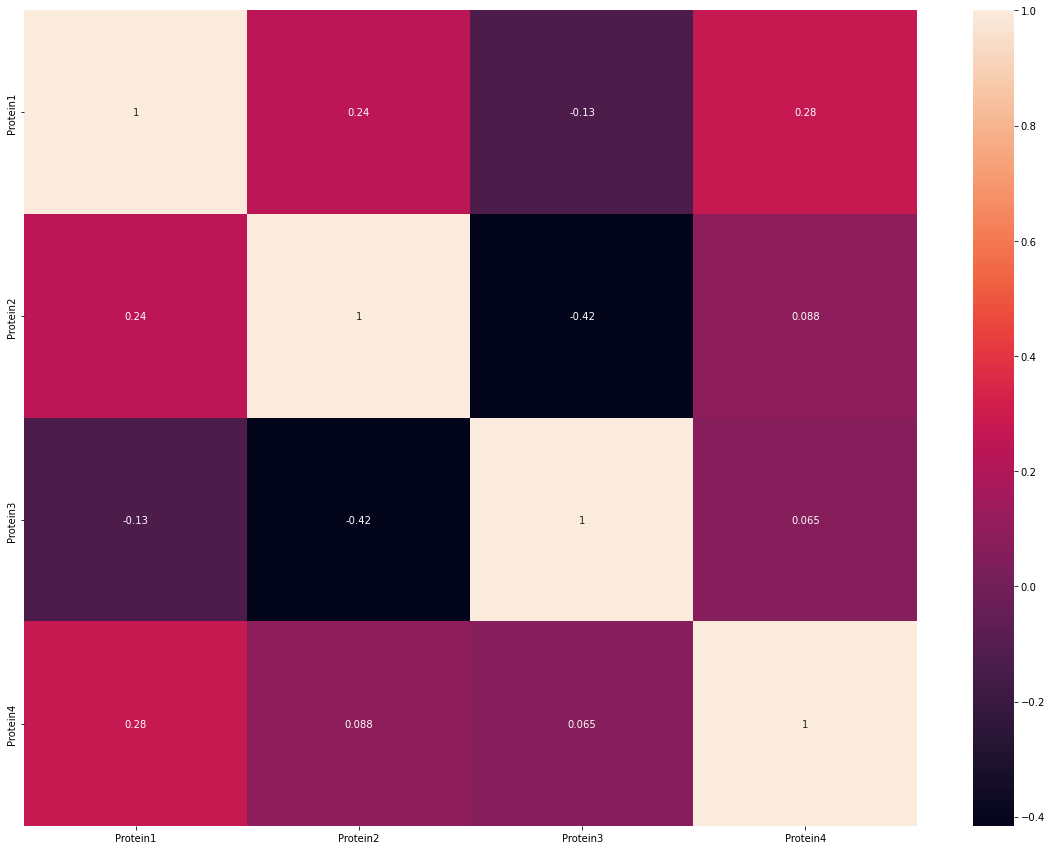

In [10]:
# correlation between each protein
plt.figure(figsize=(20, 15))
sns.heatmap(df.loc[:, 'Protein1':'Protein4'].corr(), annot=True)
plt.show()

In [18]:
# number of patients in each tumour stage
df['Tumour_Stage'].value_counts()

II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64

In [19]:
# average ages in each tumour stage
df.groupby('Tumour_Stage')['Age'].mean()

Tumour_Stage
I      62.359375
II     59.052910
III    55.753086
Name: Age, dtype: float64

In [13]:
# average value of each protein in each tumour stage
print('Protein1\n', df.groupby('Tumour_Stage')['Protein1'].mean(), '\n',
      'Protein2\n', df.groupby('Tumour_Stage')['Protein2'].mean(), '\n',
      'Protein3\n', df.groupby('Tumour_Stage')['Protein3'].mean(), '\n',
      'Protein4\n', df.groupby('Tumour_Stage')['Protein4'].mean())

Protein1
 Tumour_Stage
I     -0.014430
II    -0.007734
III   -0.094220
Name: Protein1, dtype: float64 
 Protein2
 Tumour_Stage
I      1.001318
II     0.964763
III    0.862207
Name: Protein2, dtype: float64 
 Protein3
 Tumour_Stage
I     -0.165147
II    -0.065409
III   -0.088845
Name: Protein3, dtype: float64 
 Protein4
 Tumour_Stage
I      0.037828
II     0.018023
III   -0.031453
Name: Protein4, dtype: float64


In [17]:
# number of patients in each histology
df['Histology'].value_counts()

Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [20]:
# average ages in each histology
df.groupby('Histology')['Age'].mean()

Histology
Infiltrating Ductal Carcinoma     59.862661
Infiltrating Lobular Carcinoma    56.651685
Mucinous Carcinoma                56.500000
Name: Age, dtype: float64

In [21]:
# number of patient of each tumour stage in each histology
df.groupby('Histology')['Tumour_Stage'].value_counts()

Histology                       Tumour_Stage
Infiltrating Ductal Carcinoma   II              124
                                III              59
                                I                50
Infiltrating Lobular Carcinoma  II               56
                                III              22
                                I                11
Mucinous Carcinoma              II                9
                                I                 3
Name: Tumour_Stage, dtype: int64

In [22]:
df['ER status'].value_counts()

Positive    334
Name: ER status, dtype: int64

In [23]:
df['PR status'].value_counts()

Positive    334
Name: PR status, dtype: int64

In [24]:
df['HER2 status'].value_counts()

Negative    305
Positive     29
Name: HER2 status, dtype: int64

In [25]:
df['Surgery_type'].value_counts()

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64

In [26]:
# Average ages in each surgery type
df.groupby('Surgery_type')['Age'].mean()

Surgery_type
Lumpectomy                     61.000000
Modified Radical Mastectomy    57.041667
Other                          59.400000
Simple Mastectomy              58.641791
Name: Age, dtype: float64

In [27]:
# Number of patients of each tumour stage in each surgery type
df.groupby('Surgery_type')['Tumour_Stage'].value_counts()

Surgery_type                 Tumour_Stage
Lumpectomy                   II              36
                             I               22
                             III              8
Modified Radical Mastectomy  II              49
                             III             39
                             I                8
Other                        II              61
                             III             24
                             I               20
Simple Mastectomy            II              43
                             I               14
                             III             10
Name: Tumour_Stage, dtype: int64

In [28]:
# Number of patients of each histology in each surgery type
df.groupby('Surgery_type')['Histology'].value_counts()

Surgery_type                 Histology                     
Lumpectomy                   Infiltrating Ductal Carcinoma     48
                             Infiltrating Lobular Carcinoma    13
                             Mucinous Carcinoma                 5
Modified Radical Mastectomy  Infiltrating Ductal Carcinoma     64
                             Infiltrating Lobular Carcinoma    27
                             Mucinous Carcinoma                 5
Other                        Infiltrating Ductal Carcinoma     70
                             Infiltrating Lobular Carcinoma    35
Simple Mastectomy            Infiltrating Ductal Carcinoma     51
                             Infiltrating Lobular Carcinoma    14
                             Mucinous Carcinoma                 2
Name: Histology, dtype: int64

In [29]:
# Number of patient in each patient status
df['Patient_Status'].value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

Patients who dead

In [32]:
df[df['Patient_Status'] == 'Dead']['Age'].describe()

count    66.000000
mean     59.151515
std      13.213329
min      29.000000
25%      48.250000
50%      58.500000
75%      68.000000
max      88.000000
Name: Age, dtype: float64

In [35]:
# The most frequent age
df[df['Patient_Status'] == 'Dead']['Age'].value_counts().head()

47.0    6
68.0    5
56.0    4
54.0    3
79.0    3
Name: Age, dtype: int64

In [36]:
# Number of patients who dead in each tumour stage
df[df['Patient_Status'] == 'Dead']['Tumour_Stage'].value_counts()

II     38
III    18
I      10
Name: Tumour_Stage, dtype: int64

In [37]:
# Number of patients who dead in each histology type
df[df['Patient_Status'] == 'Dead']['Histology'].value_counts()

Infiltrating Ductal Carcinoma     47
Infiltrating Lobular Carcinoma    16
Mucinous Carcinoma                 3
Name: Histology, dtype: int64

In [39]:
# Number of patients who dead in each surgery type
df[df['Patient_Status'] == 'Dead']['Surgery_type'].value_counts()

Other                          25
Modified Radical Mastectomy    20
Simple Mastectomy              12
Lumpectomy                      9
Name: Surgery_type, dtype: int64

In [40]:
# Number of patients who dead in Breast Cancer HER2 Status
df[df['Patient_Status'] == 'Dead']['HER2 status'].value_counts()

Negative    62
Positive     4
Name: HER2 status, dtype: int64

In [42]:
# average value of each protein in case of patients who dead
print('\nProtein1', df[df['Patient_Status'] == 'Dead']['Protein1'].mean(),
      '\nProtein2', df[df['Patient_Status'] == 'Dead']['Protein2'].mean(),
      '\nProtein3', df[df['Patient_Status'] == 'Dead']['Protein3'].mean(),
      '\nProtein4', df[df['Patient_Status'] == 'Dead']['Protein1'].mean())


Protein1 -0.04405901060606061 
Protein2 1.102850606060606 
Protein3 -0.057874133333333355 
Protein4 -0.04405901060606061


Preprocessing object columns

In [47]:
preprocess = preprocessing.LabelEncoder()
# Preprocessing of Tumour_Stage
label = preprocess.fit_transform(df['Tumour_Stage'])
df['Tumour_Stage'] = label

In [48]:
# Preprocessing of Histology
label = preprocess.fit_transform(df['Histology'])
df['Histology'] = label

In [49]:
# Preprocessing of Surgery_type
label = preprocess.fit_transform(df['Surgery_type'])
df['Surgery_type'] = label

In [50]:
# Preprocessing of HER2 status
label = preprocess.fit_transform(df['HER2 status'])
df['HER2 status'] = label

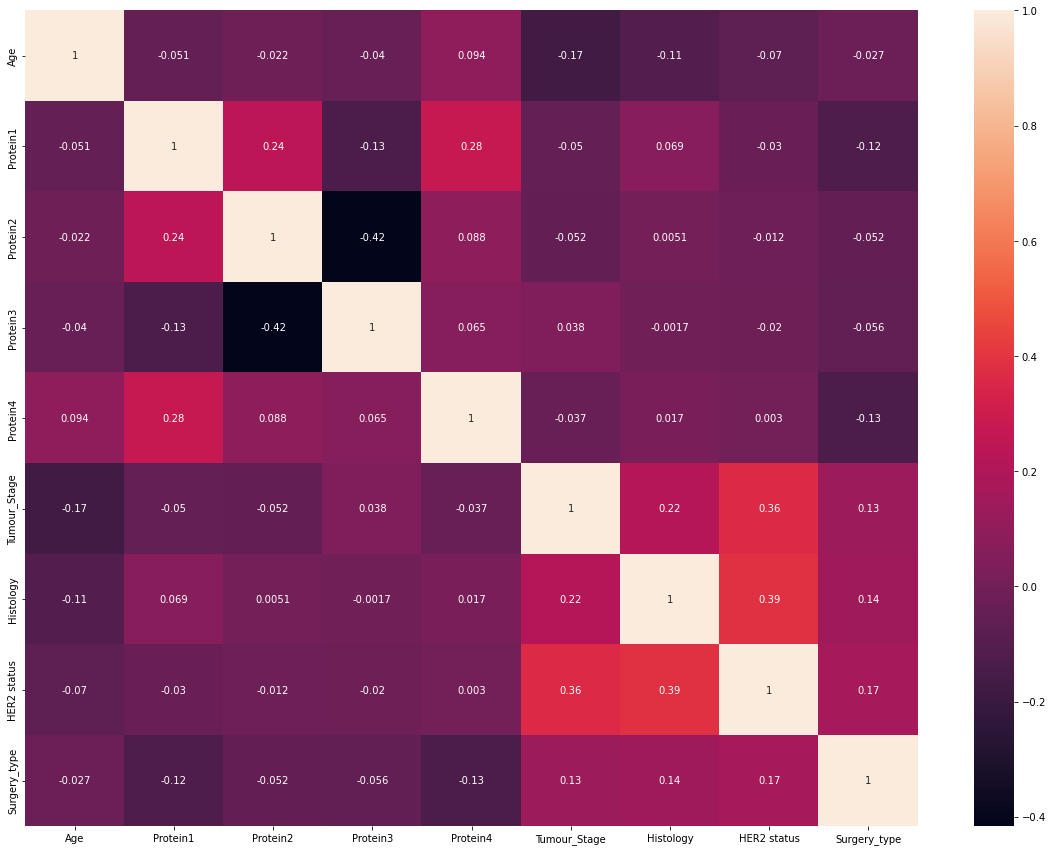

In [52]:
# Correlation between columns
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()